Using TensorFlow backend.


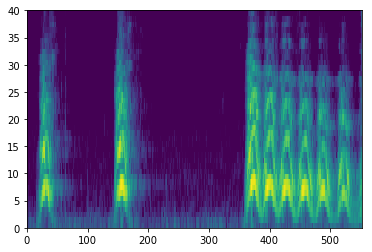

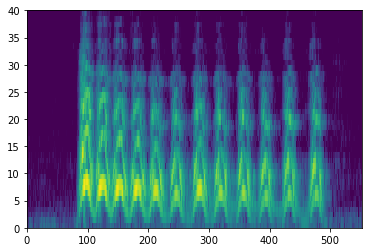

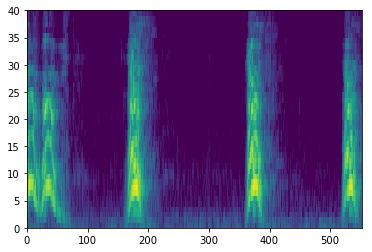

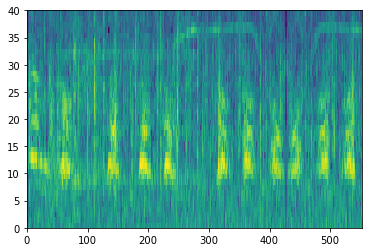

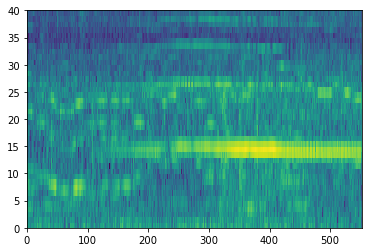

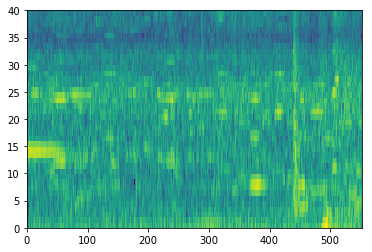

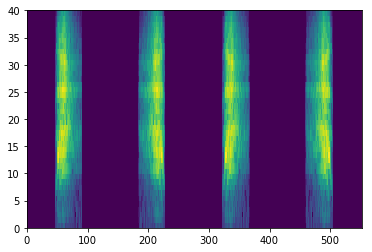

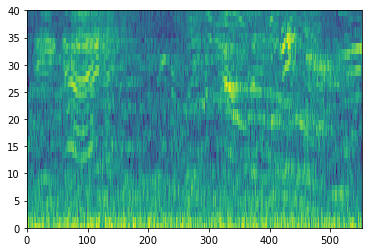

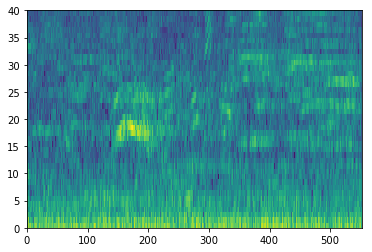

In [1]:
import os
import sys
sys.path.append('common')
import util, audio_preprocessing

import shutil
import numpy as np
import keras
import keras.backend as K
from keras.callbacks import ModelCheckpoint, Callback, TensorBoard
from matplotlib import pyplot as plt
%matplotlib inline
from cyclic_lr import CyclicLR

from dataset import SingleDataset
from model import model_cnn_alexnet

TRY = 'USD1'
LOG_DIR = './%slog' % TRY
USD_PREFIX = 'usd_'

batch_size = 32
epochs = 150

d = SingleDataset(USD_PREFIX,
                   ['air_conditioner',  'car_horn', 'children_playing', 'dog_bark', 'drilling',
                    'engine_idling', 'gun_shot','jackhammer', 'siren', 'street_music'],
                   batch_size)
# Confirmation
def plot_dataset(X, n=3):
    for i in range(n):
        x = X[i]
        plt.pcolormesh(x[..., -1])
        plt.show()
for X in [d.X_train, d.X_valid, d.X_test]:
    plot_dataset(X)

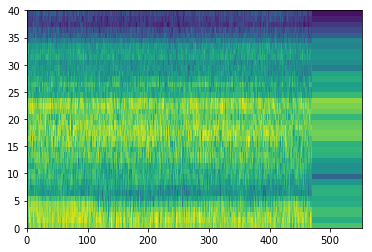

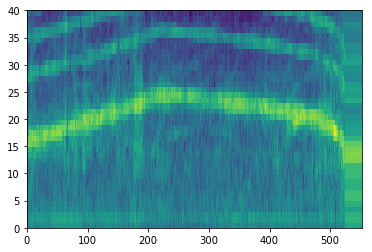

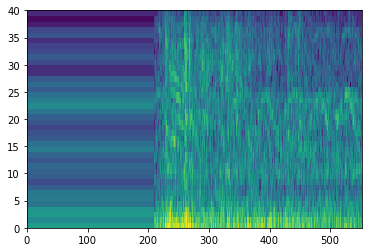

In [2]:
callbacks = [
    CyclicLR(base_lr=0.00007, max_lr=0.0007, step_size=d.X_train.shape[0] // batch_size, mode='triangular'),
    ModelCheckpoint('model%s.h5' % TRY,
                monitor='val_acc',
                verbose=1,
                save_best_only=True,
                save_weights_only=True),
     keras.callbacks.TensorBoard(log_dir=LOG_DIR, histogram_freq=0, write_graph=True, write_images=True)
]

# Clean up log
shutil.rmtree(LOG_DIR, ignore_errors=True)

for b in d.train_generator:
    for X in [b[0][:5]]:
        plot_dataset(X)
    break

In [3]:
model = model_cnn_alexnet(d.X_train.shape[1:], d.num_classes)
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 20, 184, 48)       5856      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 91, 48)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 18, 91, 48)        192       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 31, 128)        153728    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 15, 128)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 4, 15, 128)        512       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 15, 192)        221376    
__________

In [5]:
model.fit_generator(d.train_generator,
                    steps_per_epoch=d.X_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=d.valid_generator, callbacks=callbacks)

Epoch 1/150
185/186 [============================>.] - ETA: 0s - loss: 2.4804 - acc: 0.1855
Epoch 00001: val_acc improved from -inf to 0.32727, saving model to modelUSD1.h5
186/186 [==============================] - 6s 32ms/step - loss: 2.4787 - acc: 0.1855 - val_loss: 1.9356 - val_acc: 0.3273
Epoch 2/150
185/186 [============================>.] - ETA: 0s - loss: 2.0830 - acc: 0.2747
Epoch 00002: val_acc improved from 0.32727 to 0.49394, saving model to modelUSD1.h5
186/186 [==============================] - 5s 28ms/step - loss: 2.0828 - acc: 0.2747 - val_loss: 1.6352 - val_acc: 0.4939
Epoch 3/150
185/186 [============================>.] - ETA: 0s - loss: 1.9930 - acc: 0.3373
Epoch 00003: val_acc did not improve
186/186 [==============================] - 5s 29ms/step - loss: 1.9920 - acc: 0.3377 - val_loss: 1.7610 - val_acc: 0.3929
Epoch 4/150
185/186 [============================>.] - ETA: 0s - loss: 1.9414 - acc: 0.3639
Epoch 00004: val_acc improved from 0.49394 to 0.52222, saving mo

Epoch 32/150
184/186 [============================>.] - ETA: 0s - loss: 1.3473 - acc: 0.7109
Epoch 00032: val_acc did not improve
186/186 [==============================] - 6s 31ms/step - loss: 1.3476 - acc: 0.7098 - val_loss: 1.1334 - val_acc: 0.6455
Epoch 33/150
184/186 [============================>.] - ETA: 0s - loss: 1.3045 - acc: 0.7301
Epoch 00033: val_acc did not improve
186/186 [==============================] - 6s 31ms/step - loss: 1.3051 - acc: 0.7298 - val_loss: 1.1434 - val_acc: 0.6848
Epoch 34/150
184/186 [============================>.] - ETA: 0s - loss: 1.3207 - acc: 0.7293
Epoch 00034: val_acc did not improve
186/186 [==============================] - 6s 30ms/step - loss: 1.3196 - acc: 0.7293 - val_loss: 1.1577 - val_acc: 0.6434
Epoch 35/150
185/186 [============================>.] - ETA: 0s - loss: 1.2982 - acc: 0.7353
Epoch 00035: val_acc did not improve
186/186 [==============================] - 6s 30ms/step - loss: 1.2980 - acc: 0.7359 - val_loss: 1.2375 - val_acc:

185/186 [============================>.] - ETA: 0s - loss: 1.0627 - acc: 0.8372
Epoch 00096: val_acc did not improve
186/186 [==============================] - 5s 29ms/step - loss: 1.0625 - acc: 0.8370 - val_loss: 1.0226 - val_acc: 0.6778
Epoch 97/150
185/186 [============================>.] - ETA: 0s - loss: 1.0499 - acc: 0.8368
Epoch 00097: val_acc did not improve
186/186 [==============================] - 6s 31ms/step - loss: 1.0493 - acc: 0.8367 - val_loss: 0.9962 - val_acc: 0.6980
Epoch 98/150
185/186 [============================>.] - ETA: 0s - loss: 1.0718 - acc: 0.8301
Epoch 00098: val_acc did not improve
186/186 [==============================] - 6s 30ms/step - loss: 1.0710 - acc: 0.8305 - val_loss: 1.0010 - val_acc: 0.6687
Epoch 99/150
185/186 [============================>.] - ETA: 0s - loss: 1.0305 - acc: 0.8471
Epoch 00099: val_acc did not improve
186/186 [==============================] - 6s 30ms/step - loss: 1.0300 - acc: 0.8478 - val_loss: 0.9819 - val_acc: 0.6818
Epoch

Epoch 129/150
185/186 [============================>.] - ETA: 0s - loss: 0.9935 - acc: 0.8573
Epoch 00129: val_acc did not improve
186/186 [==============================] - 5s 30ms/step - loss: 0.9940 - acc: 0.8570 - val_loss: 1.0183 - val_acc: 0.6727
Epoch 130/150
185/186 [============================>.] - ETA: 0s - loss: 1.0259 - acc: 0.8394
Epoch 00130: val_acc did not improve
186/186 [==============================] - 6s 30ms/step - loss: 1.0256 - acc: 0.8394 - val_loss: 1.0382 - val_acc: 0.6707
Epoch 131/150
185/186 [============================>.] - ETA: 0s - loss: 0.9956 - acc: 0.8519
Epoch 00131: val_acc did not improve
186/186 [==============================] - 6s 30ms/step - loss: 0.9959 - acc: 0.8515 - val_loss: 1.1155 - val_acc: 0.6717
Epoch 132/150
185/186 [============================>.] - ETA: 0s - loss: 1.0049 - acc: 0.8505
Epoch 00132: val_acc did not improve
186/186 [==============================] - 5s 29ms/step - loss: 1.0042 - acc: 0.8503 - val_loss: 1.0295 - val_

In [6]:
# CONFIRMATION ON INITIAL TRAINING
model.load_weights('model%s.h5' % TRY)
results = model.evaluate_generator(d.valid_generator)
print(model.metrics_names, results)

['loss', 'acc'] [1.0041625086707298, 0.7101010103418369]


In [7]:
# CONFIRMATION ON INITIAL TRAINING
model.load_weights('model%s.h5' % TRY)
y_valid_preds = model.predict_generator(d.valid_generator)
y_valid_pred_cls = [np.argmax(pred) for pred in y_valid_preds]
y_valid_refs = [np.argmax(y) for y in d.y_valid]

np.save('preds%s4valid.npy' % TRY, y_valid_preds)
valid_results = [result == ref for result, ref in zip(y_valid_pred_cls, y_valid_refs)]

# accuracy
print(np.sum(valid_results)/len(valid_results))

# double check answers
for result, ref in zip(y_valid_pred_cls[:10], y_valid_refs[:10]):
    print(result, '\t', ref)

0.7101010101010101
3 	 3
9 	 9
9 	 9
8 	 9
2 	 9
9 	 9
8 	 9
3 	 3
3 	 3
3 	 3


In [8]:
# CONFIRMATION w/ test set
model.load_weights('model%s.h5' % TRY)
y_test_preds = model.predict_generator(d.test_generator)
y_test_pred_cls = [np.argmax(pred) for pred in y_test_preds]
y_test_refs = [np.argmax(y) for y in d.y_test]
test_results = [result == ref for result, ref in zip(y_test_pred_cls, y_test_refs)]

# accuracy
print(np.sum(test_results)/len(test_results))

# double check answers
for result, ref in zip(y_test_pred_cls[:10], y_test_refs[:10]):
    print(result, '\t', ref)

0.7168803418803419
3 	 3
2 	 2
2 	 2
2 	 2
2 	 2
2 	 2
2 	 2
2 	 2
2 	 2
7 	 0


In [ ]:
tensorboard --logdir=T1AugAll:T1_2log,T2Aug2:T2log,T3Aug1:T3log,T4NoAug:T4log,Leak:T4Leaklog